In [1]:
import os
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit

In [2]:
# Cargo el excel de la EPH
eph_todo = pd.read_csv("eph_panel.csv")

C:\Users\felip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (102,179,182,187,207,209) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
eph_todo = eph_todo.drop_duplicates(subset=["CODUSU","COMPONENTE","ANO4","TRIMESTRE"])

In [4]:
def limpiar_eph(eph):

    '''
        función para limpiar la eph
        input:
            eph: Variable que tenga almacenada la eph sin limpiar

        output:
            eph: Variable que tiene almacenada la eph limpia
    '''
    
    eph.dropna(thresh = 1, inplace = True) # Si tiene todos NA, la fila se va
    
    eph.dropna(thresh = 1, axis = "columns", inplace = True) # Si la columna tiene todos NA, la columna se va
    
    try:
        # Si no lo defino como uno me dropea un montón de filas que tienen NaN
        eph.PP08D1 = eph.PP08D1.fillna(0)
        # dropeo observaciones con valores que no tienen sentido. CH06 = edad, PP08D1, P21, P47T, ITF y IPCF son todas variables
        # de ingresos, no pueden ser menores a 0
        eph.fillna(0, inplace = True) # Relleno todos con 0 los missing de las columnas que representan subcategorías en
        #las que solo respondieron algunos. 
        eph.reset_index(inplace = True, drop = True)  
    except:
        print("No se encontró alguna columna, revisar")   

In [5]:
columnas_ing = ["AGLOMERADO","COMPONENTE","MAS_500","CH04","CH06","CH08","PP02E","PP02I","PP3E_TOT","PP3F_TOT",
"CH09","CH10","CH11","CH12","CH13","CH15","CH07","CH16","NIVEL_ED","ESTADO","CAT_OCUP","CAT_INAC","PP04B3_ANO",
"PP03G","PP03I","INTENSI","PP11T","PP11S","PP11O","PP11N","PP11L1","PP10D","PP10A","PP10C","PP07H","PP07G4","PP11A",
"PP10E","PP09C","PP07K","PP07G_59","PP07G2","PP07G1","PP07C","PP07A","PP05H","PP04G","IV2","IV11","IV12_3","IV1", 
"TRIMESTRE","CODUSU","ANO4","PONDERA","II7","II8","II9","V5","V17","IV3","V4","IV6","IV7","IV8","IV9","V3","V6","V8",
"IV10","IV11","II4_1","II4_2","II4_3","V1","V2","V9","V10","V13","V14","V15","V18","IX_TOT","IX_MEN10","ITF","DECIFR",
"ADECIFR","IPCF","DECCFR","ADECCFR","PONDIH","PP08D1","P21","DECOCUR","TOT_P12","P47T"]

columnas = ["AGLOMERADO","COMPONENTE","MAS_500","CH04","CH06","CH08","PP02E","PP02I","PP3E_TOT","PP3F_TOT",
"CH09","CH10","CH11","CH12","CH13","CH15","CH07","CH16","NIVEL_ED","ESTADO","CAT_OCUP","CAT_INAC","PP04B3_ANO",
"PP03G","PP03I","INTENSI","PP11T","PP11S","PP11O","PP11N","PP11L1","PP10D","PP10A","PP10C","PP07H","PP07G4","PP11A",
"PP10E","PP09C","PP07K","PP07G_59","PP07G2","PP07G1","PP07C","PP07A","PP05H","PP04G","IV2","IV11","IV12_3","IV1", 
"TRIMESTRE","CODUSU","ANO4","PONDERA","II7","II8","II9","V5","V17","IV3","V4","IV6","IV7","IV8","IV9","V3","V6","V8",
"IV10","IV11","II4_1","II4_2","II4_3","V1","V2","V9","V10","V13","V14","V15","V18","IX_TOT","IX_MEN10"]

In [6]:
eph = eph_todo[columnas_ing]

In [7]:
limpiar_eph(eph)

<ipython-input-4-7d9f8ee8e7f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph.dropna(thresh = 1, inplace = True) # Si tiene todos NA, la fila se va
<ipython-input-4-7d9f8ee8e7f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph.dropna(thresh = 1, axis = "columns", inplace = True) # Si la columna tiene todos NA, la columna se va
C:\Users\felip\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [8]:
eph["CH06"] = eph["CH06"].replace(-1, 35)

<ipython-input-8-4366311f0076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph["CH06"] = eph["CH06"].replace(-1, 35)


In [ ]:
#Importamos la tabla de excel
tabla_adulto = pd.read_excel("tabla_adulto_equiv.xlsx", header = 3)
#Ajustamos el formato de la tabla 
tabla_adulto.dropna(axis = 1, inplace = True, thresh = 10)
tabla_adulto.dropna(inplace = True, thresh = 3)
tabla_adulto.reset_index(inplace = True, drop = True)
#Creamos la columna "adulto_equiv" como una columna de ceros
eph["adulto_equiv"] = 0
#Generamos una nueva columna llamada lista como una columna de ceros 
eph["lista"] = 0
#Iteramos por filas
#Para cada fila del data frame de acuerdo a la edad le indicamos que 
#la celda de la columna "lista" la complete con el número correspondiente 
#al índice de la tabla_adulto. 
#Por ejemplo, si la edad es menor a 30 entonces se asigna el numero 18 que es
#el índice de la fila de 18 a 29 años. 
for i in eph.index:
    if eph.loc[i, "CH06"] < 19:
        eph.loc[i, "lista"] = eph.loc[i, "CH06"]
    elif eph.loc[i, "CH06"] < 30:
        eph.loc[i, "lista"] = 18
    elif eph.loc[i, "CH06"] < 46:
        eph.loc[i, "lista"] = 19
    elif eph.loc[i, "CH06"] < 61:
        eph.loc[i, "lista"] = 20
    elif eph.loc[i, "CH06"] < 76:
        eph.loc[i, "lista"] = 21
    else:
        eph.loc[i, "lista"] = 22
#CH06 = edad, CH04 = Sexo (1 = varon y 2 = mujer)
#Para cada fila del dataframe si el individuo es varón entonces le indicamos que bajo 
#la columna "adulto_equiv" coloque la siguiente celda de tabla_adulto: 
# Fila: el índice que esta guardado en la columna "lista" en el df eph. 
# Columna: Varones 
#idem para las mujeres
#De este modo se obtienen los valores de adulto equivalente de cada persona según 
#su sexo y edad
for i in eph.index:
    if eph.loc[i, "CH04"] == 1:
        eph.loc[i, "adulto_equiv"] = tabla_adulto.loc[eph.loc[i, "lista"], "Varones"]
    elif eph.loc[i, "CH04"] == 2:
        eph.loc[i, "adulto_equiv"] = tabla_adulto.loc[eph.loc[i, "lista"], "Mujeres"]
#Eliminamos la columna "lista"
eph.drop("lista", axis = 1, inplace = True)
#Realizamos un groupby: para cada hogar sumamos "adulto_equiv"
ad_equiv_hogar = eph[["CODUSU","ANO4","TRIMESTRE","adulto_equiv"]].groupby(["CODUSU","ANO4","TRIMESTRE"]).sum()
ad_equiv_hogar.reset_index(inplace = True)
#cambiamos los nombres de las columnas
ad_equiv_hogar.columns = ["CODUSU","ANO4","TRIMESTRE","ad_equiv_hogar"]
#agregamos la columnna "ad_equiv_hogar" al df eph
eph = eph.merge(ad_equiv_hogar, on = ["CODUSU","ANO4","TRIMESTRE"], how = "left")

<ipython-input-9-7bbed948d211>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph["adulto_equiv"] = 0
<ipython-input-9-7bbed948d211>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph["lista"] = 0
C:\Users\felip\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
# Dividimos la muestra de la EPH en gente que no respondió ingresos totales familiares (ITF) y los que sí.
norespondieron = eph[eph["ITF"] <= 0]
norespondieron.reset_index(inplace = True, drop = True)
respondieron = eph[eph["ITF"] > 0]
respondieron.reset_index(inplace = True, drop = True)

In [ ]:
test = respondieron.groupby(["CODUSU","COMPONENTE"]).agg({"ANO4":"count"})
test.reset_index(inplace = True)
test.rename(columns={'ANO4': 'aparece'}, inplace=True)
respondieron = respondieron.merge(test, on = ["CODUSU","COMPONENTE"], how = "left")
respondieron = respondieron[respondieron["aparece"]==4]
respondieron.drop("aparece",axis=1,inplace=True)

In [ ]:
# Ingresos mínimos por trimestre, hice un promedio del CBT por trimestre.
im_2t_2016 = 3812
im_3t_2016 = 4055
im_4t_2016 = 4232
im_1t_2017 = 4432
im_2t_2017 = 4744
im_3t_2017 = 4932
im_4t_2017 = 5219

# Creamos una columna de ingreso necesario para no ser pobre y la rellenamos con el for loop teniendo en cuenta el año
# y trimestre. Toma valores dependiendo de la columna ad_equiv_hogar * ingreso minimo per cápita.
respondieron["ingreso_necesario"] = 0
for i in respondieron.index:
    if (respondieron.loc[i, "ANO4"] == 2016) & (respondieron.loc[i, "TRIMESTRE"] == 2):
        respondieron.loc[i, "ingreso_necesario"] = im_2t_2016 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2016) & (respondieron.loc[i, "TRIMESTRE"] == 3):
        respondieron.loc[i, "ingreso_necesario"] = im_3t_2016 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2016) & (respondieron.loc[i, "TRIMESTRE"] == 4):
        respondieron.loc[i, "ingreso_necesario"] = im_4t_2016 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2017) & (respondieron.loc[i, "TRIMESTRE"] == 1):
        respondieron.loc[i, "ingreso_necesario"] = im_1t_2017 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2017) & (respondieron.loc[i, "TRIMESTRE"] == 2):
        respondieron.loc[i, "ingreso_necesario"] = im_2t_2017 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2017) & (respondieron.loc[i, "TRIMESTRE"] == 3):
        respondieron.loc[i, "ingreso_necesario"] = im_3t_2017 * respondieron.loc[i,"ad_equiv_hogar"]
    elif (respondieron.loc[i, "ANO4"] == 2017) & (respondieron.loc[i, "TRIMESTRE"] == 4):
        respondieron.loc[i, "ingreso_necesario"] = im_4t_2017 * respondieron.loc[i,"ad_equiv_hogar"]
        
# Creamos una columna dummy, que dice si el individuo es pobre o no. Depende de si sus ingresos
# son mayores a ingreso_necesario
respondieron["pobre"] = (respondieron["ITF"] < respondieron["ingreso_necesario"]).astype(int)

# Estadística descriptiva

In [23]:
columns_names = respondieron.columns.values

In [24]:
columns_names

array(['AGLOMERADO', 'COMPONENTE', 'MAS_500', 'CH04', 'CH06', 'CH08',
       'PP02E', 'PP02I', 'PP3E_TOT', 'PP3F_TOT', 'CH09', 'CH10', 'CH11',
       'CH12', 'CH13', 'CH15', 'CH07', 'CH16', 'NIVEL_ED', 'ESTADO',
       'CAT_OCUP', 'CAT_INAC', 'PP04B3_ANO', 'PP03G', 'PP03I', 'INTENSI',
       'PP11T', 'PP11S', 'PP11O', 'PP11N', 'PP11L1', 'PP10D', 'PP10A',
       'PP10C', 'PP07H', 'PP07G4', 'PP11A', 'PP10E', 'PP09C', 'PP07K',
       'PP07G_59', 'PP07G2', 'PP07G1', 'PP07C', 'PP07A', 'PP05H', 'PP04G',
       'IV2', 'IV11', 'IV12_3', 'IV1', 'TRIMESTRE', 'CODUSU', 'ANO4',
       'PONDERA', 'II7', 'II8', 'II9', 'V5', 'V17', 'IV3', 'V4', 'IV6',
       'IV7', 'IV8', 'IV9', 'V3', 'V6', 'V8', 'IV10', 'IV11', 'II4_1',
       'II4_2', 'II4_3', 'V1', 'V2', 'V9', 'V10', 'V13', 'V14', 'V15',
       'V18', 'IX_TOT', 'IX_MEN10', 'ITF', 'DECIFR', 'ADECIFR', 'IPCF',
       'DECCFR', 'ADECCFR', 'PONDIH', 'PP08D1', 'P21', 'DECOCUR',
       'TOT_P12', 'P47T', 'adulto_equiv', 'ad_equiv_hogar',
       'ingreso

In [34]:
eph_pob = respondieron.groupby(["CODUSU","ANO4","TRIMESTRE"]).agg({"PONDIH":"mean","pobre":"mean"})
eph_pob.reset_index(inplace=True)
pon_pob_t2_16 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 2) & 
                        (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_pob_t3_16 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 3) & 
                        (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_pob_t4_16 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 4) & 
                        (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_pob_t2_17 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 2) & 
                        (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
pon_pob_t3_17 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 3) & 
                        (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
pon_pob_t4_17 = eph_pob[(eph_pob["pobre"] == 1) & (eph_pob["TRIMESTRE"] == 4) & 
                        (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
pon_tot_t2_16 = eph_pob[(eph_pob["TRIMESTRE"] == 2) & (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_tot_t3_16 = eph_pob[(eph_pob["TRIMESTRE"] == 3) & (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_tot_t4_16 = eph_pob[(eph_pob["TRIMESTRE"] == 4) & (eph_pob["ANO4"] == 2016)].apply({"PONDIH":"sum"})
pon_tot_t2_17 = eph_pob[(eph_pob["TRIMESTRE"] == 2) & (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
pon_tot_t3_17 = eph_pob[(eph_pob["TRIMESTRE"] == 3) & (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
pon_tot_t4_17 = eph_pob[(eph_pob["TRIMESTRE"] == 4) & (eph_pob["ANO4"] == 2017)].apply({"PONDIH":"sum"})
ratio = {"2016_t2":pon_pob_t2_16.item()/pon_tot_t2_16.item(),"2016_t3":pon_pob_t3_16.item()/pon_tot_t3_16.item(),
         "2016_t4":pon_pob_t4_16.item()/pon_tot_t4_16.item(),"2017_t2":pon_pob_t2_17.item()/pon_tot_t2_17.item(),
         "2017_t3":pon_pob_t3_17.item()/pon_tot_t3_17.item(),"2017_t4":pon_pob_t4_17.item()/pon_tot_t4_17.item()}

In [190]:
#Calculamos en cuantos trimestres en total individuos se encontraron en situación de Pobreza 
respondieron.pobre.sum()

15210

In [191]:
gente_pobre = respondieron.groupby(["CODUSU","COMPONENTE"]).agg({"pobre":"max"})

In [192]:
gente_pobre

pobre
CODUSU                        COMPONENTE       
TQRMNOPPQHJKKTCDEHMHF00479193 1               0
                              2               0
TQRMNOPPQHJMKRCDEFOCD00472238 1               1
                              2               1
                              3               1
...                                         ...
TQUMNOPQUHJMLOCDEFMDB00471489 3               1
TQUMNOPXSHKNKPCDEIHJF00494381 1               0
                              2               0
TQVMNOPXSHKNKPCDEIHJF00494445 1               0
                              2               0

[11008 rows x 1 columns]

In [193]:
#Calculamos cuanta gente fue pobre en al menos uno de los 4 perídos
gente_pobre.pobre.sum()

5570

In [194]:
#Cuanta gente hay en la muestra
gente_pobre.pobre.count()

11008

In [197]:
5570/11008

0.5059956395348837

El 50% de las personas fue pobre en al menos 1 de los 4 períodos. 

In [204]:
#Ahora calculamos la tasa de pobreza por trimestre
per_t2_2016 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2016)].pobre.count()
per_t3_2016 = respondieron[(respondieron["TRIMESTRE"] == 3) & (respondieron["ANO4"] == 2016)].pobre.count()
per_t4_2016 = respondieron[(respondieron["TRIMESTRE"] == 4) & (respondieron["ANO4"] == 2016)].pobre.count()
per_t1_2017 = respondieron[(respondieron["TRIMESTRE"] == 1) & (respondieron["ANO4"] == 2017)].pobre.count()
per_t2_2017 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2017)].pobre.count()
per_t3_2017 = respondieron[(respondieron["TRIMESTRE"] == 3) & (respondieron["ANO4"] == 2017)].pobre.count()
per_t4_2017 = respondieron[(respondieron["TRIMESTRE"] == 4) & (respondieron["ANO4"] == 2017)].pobre.count()
pob_t2_2016 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2016)].pobre.sum()
pob_t3_2016 = respondieron[(respondieron["TRIMESTRE"] == 3) & (respondieron["ANO4"] == 2016)].pobre.sum()
pob_t4_2016 = respondieron[(respondieron["TRIMESTRE"] == 4) & (respondieron["ANO4"] == 2016)].pobre.sum()
pob_t1_2017 = respondieron[(respondieron["TRIMESTRE"] == 1) & (respondieron["ANO4"] == 2017)].pobre.sum()
pob_t2_2017 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2017)].pobre.sum()
pob_t3_2017 = respondieron[(respondieron["TRIMESTRE"] == 3) & (respondieron["ANO4"] == 2017)].pobre.sum()
pob_t4_2017 = respondieron[(respondieron["TRIMESTRE"] == 4) & (respondieron["ANO4"] == 2017)].pobre.sum()

In [205]:
ratios = [pob_t2_2016/per_t2_2016,pob_t3_2016/per_t3_2016,pob_t4_2016/per_t4_2016,
          pob_t2_2017/per_t2_2017,pob_t3_2017/per_t3_2017,pob_t4_2017/per_t4_2017]

In [206]:
ratio = {"2016_t2":pob_t2_2016/per_t2_2016,"2016_t3":pob_t3_2016/per_t3_2016,"2016_t4":pob_t4_2016/per_t4_2016,
        "2017_t2":pob_t2_2017/per_t2_2017,"2017_t3":pob_t3_2017/per_t3_2017,"2017_t4":pob_t4_2017/per_t4_2017}

In [35]:
ratio

{'2016_t2': 0.22387206681571326,
 '2016_t3': 0.2000394477160845,
 '2016_t4': 0.20205662475378344,
 '2017_t2': 0.20168084201320816,
 '2017_t3': 0.17904432513710022,
 '2017_t4': 0.16948532346355336}

In [207]:
#Visualizamos la cantida de pobres por periodo
ratio

{'2016_t2': 0.38494700916112806,
 '2016_t3': 0.3585574127906977,
 '2016_t4': 0.3672119095754457,
 '2017_t2': 0.3465061972336986,
 '2017_t3': 0.3117732558139535,
 '2017_t4': 0.3236537401213012}

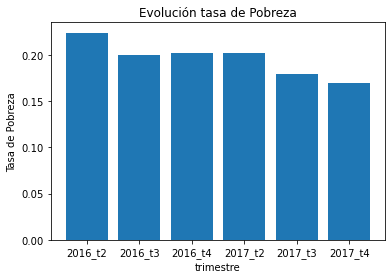

In [36]:
#Graficamos la evolución de la Tasa de Pobreza
eje_x = list(ratio.keys())
eje_y = list(ratio.values())
plt.bar(eje_x, eje_y)
plt.ylabel('Tasa de Pobreza')
plt.xlabel("trimestre")
plt.title('Evolución tasa de Pobreza')
plt.show()

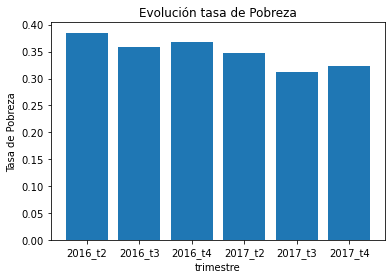

In [208]:
#Graficamos la evolución de la Tasa de Pobreza
eje_x = list(ratio.keys())
eje_y = list(ratio.values())
plt.bar(eje_x, eje_y)
plt.ylabel('Tasa de Pobreza')
plt.xlabel("trimestre")
plt.title('Evolución tasa de Pobreza')
plt.show()

In [209]:
#Agregamos a cada observación una columna que indica si fue pobre o no en el periodo siguiente. 
#NOTAR: Las ultimas observaciones de cada individuo no tienen sentido
respondieron['pobre_prox'] = respondieron['pobre'].shift(-1)

### Calculamos cantidad de personas que entran a la pobreza y cantidad que salen entre periodos

In [220]:
muestra_t2_2016 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2016)].pobre.count()

per_t2_2016 = respondieron[(respondieron["TRIMESTRE"] == 2) & (respondieron["ANO4"] == 2016)].pobre.sum()
pobres_t2a3 = respondieron[(respondieron["TRIMESTRE"]==2)&
                           (respondieron["ANO4"]==2016)&
                           (respondieron["pobre"]==1)].pobre_prox.sum()
salen_t2a3 = respondieron[(respondieron["TRIMESTRE"]==2)&
                          (respondieron["ANO4"]==2016)&(respondieron["pobre"]==1)&
                          (respondieron["pobre_prox"]==0)].pobre_prox.count()
chetos_t2 = muestra_t2_2016 - per_t2_2016
entran_t2a3 = respondieron[(respondieron["TRIMESTRE"]==2)&
                           (respondieron["ANO4"]==2016)&
                           (respondieron["pobre"]==0)&
                           (respondieron["pobre_prox"]==1)].pobre_prox.count()
no_vulnerables = respondieron[(respondieron["TRIMESTRE"]==2)&
                              (respondieron["ANO4"]==2016)&
                              (respondieron["pobre"]==0)&
                              (respondieron["pobre_prox"]==0)].pobre_prox.count()




In [221]:
#Calculamos porcentaje de cada una de las 4 posibilidades
t2_t3 = {"pobres": pobres_t2a3/per_t2_2016, "salen": salen_t2a3/per_t2_2016,
         "entran": entran_t2a3/chetos_t2, "no_vulnerables": no_vulnerables/chetos_t2}
t2_t3

{'pobres': 0.7732151189920672,
 'salen': 0.22678488100793281,
 'entran': 0.10251168224299065,
 'no_vulnerables': 0.8974883177570093}

Interpretación:

-El 75% de los pobres en t2, es pobre en t3. 

-El 25% de los pobres en t2, NO es pobre en t3. 

-El 10% de los no pobres en t2, es pobre en t3. 

-El 90% de los no pobres en t2, NO es pobre en t3.

Este mismo ejercicio se puede repetir para los otros periodos. Ver bien el tema de que puede complicar los distintos tipos de datos (población i y población j)

### Clasificación de la vulnerabilidad de las personas según cuántos periodos estuvieron bajo la línea de pobreza

In [228]:
vulnerabilidad = respondieron.groupby(["CODUSU","COMPONENTE"]).agg({"pobre":"sum"})
vulnerabilidad

pobre
CODUSU                        COMPONENTE       
TQRMNOPPQHJKKTCDEHMHF00479193 1               0
                              2               0
TQRMNOPPQHJMKRCDEFOCD00472238 1               3
                              2               3
                              3               3
...                                         ...
TQUMNOPQUHJMLOCDEFMDB00471489 3               2
TQUMNOPXSHKNKPCDEIHJF00494381 1               0
                              2               0
TQVMNOPXSHKNKPCDEIHJF00494445 1               0
                              2               0

[11008 rows x 1 columns]

In [229]:
cronicos = vulnerabilidad[(vulnerabilidad["pobre"]==4)].pobre.count()
muy_vulnerables = vulnerabilidad[(vulnerabilidad["pobre"]==3)|(vulnerabilidad["pobre"]==2)].pobre.count()
vulnerables = vulnerabilidad[(vulnerabilidad["pobre"]==1)].pobre.count()
no_vulnerables = vulnerabilidad[(vulnerabilidad["pobre"]==0)].pobre.count()
total = no_vulnerables + vulnerables + muy_vulnerables + cronicos

In [230]:
vulnerabilidad = {"cronicos": cronicos/total, "muy_vulnerables": muy_vulnerables/total, "vulnerables": vulnerables/total, "no_vulnerabes": no_vulnerables/total}
vulnerabilidad

{'cronicos': 0.19240552325581395,
 'muy_vulnerables': 0.19794694767441862,
 'vulnerables': 0.11564316860465117,
 'no_vulnerabes': 0.49400436046511625}

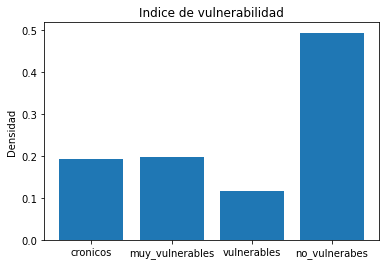

In [232]:
#Graficamos el Indice de vulnerabilidad
eje_x = list(vulnerabilidad.keys())
eje_y = list(vulnerabilidad.values())
plt.bar(eje_x, eje_y)
plt.ylabel('Densidad')
plt.title('Indice de vulnerabilidad')
plt.show()

In [ ]:
# Para arreglar que aparezcan si o si 4 veces, hago un count y si no aparecen 4 veces los elimino

In [25]:
arreglo = respondieron.groupby(["CODUSU","COMPONENTE"]).agg({"REGION":"count"})
arreglo[arreglo["REGION"]<4]